# DMI and Anisotropic Exchange for a Spin Chain
## Wes Roberts
## Computational Physics Fall 2020

Previously I wrote a loop that plots ground state energy as a function of the component of the DM vector in one direction.

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

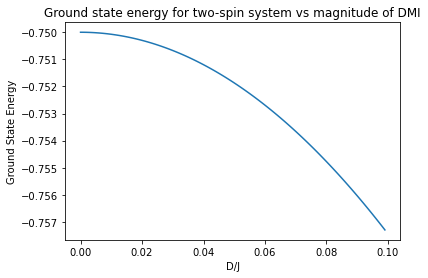

In [2]:
dD = 100

Dmag = np.zeros(dD)
energy = np.zeros(dD)
splitting = np.zeros(dD)

nsites = 2
J = 1.


for j in range(dD):
    Dmag[j] = dD*j*0.00001
    
    Dx = dD*j*0.00001j  
    Dy = dD*j*0.00001
    Dz = dD*j*0.00001j

    sz0 = np.zeros(shape=(2,2)) 
    splus0 = np.zeros(shape=(2,2)) 
    sz0[0,0]         =  0.5
    sz0[1,1]         =  -0.5
    splus0[1,0]      =  1.0
    sminus0 = np.transpose(splus0)

    Ising = np.zeros(shape=(4,4)) 
    Ising = np.kron(sz0,sz0)

    JDp = np.zeros(shape=(2,2))
    JDm = np.zeros(shape=(2,2))

    JDp = (0.5)*(J + Dz)*np.kron(splus0,sminus0)
    JDm = (0.5)*(J - Dz)*np.kron(sminus0,splus0)

    DMx = -Dx*(0.5)*(-np.kron(sz0,splus0) + np.kron(sz0,sminus0) + np.kron(splus0,sz0) - np.kron(sminus0,sz0))
    DMy = Dy*(0.5)*(np.kron(splus0,sz0) + np.kron(sminus0,sz0) - np.kron(sz0,splus0) - np.kron(sz0,sminus0))

    h2 = Ising + JDp + JDm + DMx + DMy

    H = np.zeros(shape=(2,2))
    for i in range(1,nsites):

        diml = 2**(i-1)        # 2^i
        dim = diml*2
    
        #print ("ADDING SITE ",i," DIML= ",diml)

        Ileft = np.eye(diml)
        Iright = np.eye(2)


        aux = np.zeros(shape=(dim,dim))
        aux = np.kron(H,Iright)
        H = aux

        H = H + np.kron(Ileft,h2)
    
    
    w, v = np.linalg.eigh(H) 
    #print(w[0])
    
    energy[j] = w[0]
    #splitting[j] = w[3] - w[2]


pyplot.plot(Dmag, energy);
#print(energy)
#print(Dmag)
pyplot.xlabel("D/J")
pyplot.ylabel("Ground State Energy")
pyplot.title("Ground state energy for two-spin system vs magnitude of DMI");

#pyplot.plot(Dmag, splitting)




## What about for ten sites?

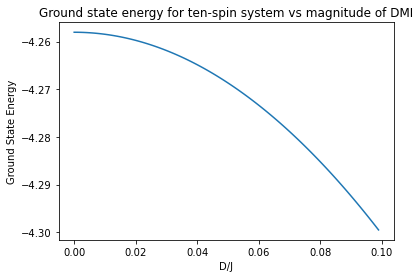

In [5]:
dD = 100

Dmag = np.zeros(dD)
energy = np.zeros(dD)
splitting = np.zeros(dD)

nsites = 10
J = 1.


for j in range(dD):
    Dmag[j] = dD*j*0.00001
    
    Dx = dD*j*0.00001j  
    Dy = dD*j*0.00001
    Dz = dD*j*0.00001j

    sz0 = np.zeros(shape=(2,2)) 
    splus0 = np.zeros(shape=(2,2)) 
    sz0[0,0]         =  0.5
    sz0[1,1]         =  -0.5
    splus0[1,0]      =  1.0
    sminus0 = np.transpose(splus0)

    Ising = np.zeros(shape=(4,4)) 
    Ising = np.kron(sz0,sz0)

    JDp = np.zeros(shape=(2,2))
    JDm = np.zeros(shape=(2,2))

    JDp = (0.5)*(J + Dz)*np.kron(splus0,sminus0)
    JDm = (0.5)*(J - Dz)*np.kron(sminus0,splus0)

    DMx = -Dx*(0.5)*(-np.kron(sz0,splus0) + np.kron(sz0,sminus0) + np.kron(splus0,sz0) - np.kron(sminus0,sz0))
    DMy = Dy*(0.5)*(np.kron(splus0,sz0) + np.kron(sminus0,sz0) - np.kron(sz0,splus0) - np.kron(sz0,sminus0))

    h2 = Ising + JDp + JDm + DMx + DMy

    H = np.zeros(shape=(2,2))
    for i in range(1,nsites):

        diml = 2**(i-1)        # 2^i
        dim = diml*2
    
        #print ("ADDING SITE ",i," DIML= ",diml)

        Ileft = np.eye(diml)
        Iright = np.eye(2)


        aux = np.zeros(shape=(dim,dim))
        aux = np.kron(H,Iright)
        H = aux

        H = H + np.kron(Ileft,h2)
    
    
    w, v = np.linalg.eigh(H) 
    #print(w[0])
    
    energy[j] = w[0]
    #splitting[j] = w[3] - w[2]


pyplot.plot(Dmag, energy);
#print(energy)
#print(Dmag)
pyplot.xlabel("D/J")
pyplot.ylabel("Ground State Energy")
pyplot.title("Ground state energy for ten-spin system vs magnitude of DMI");

#pyplot.plot(Dmag, splitting)



It's worthwhile to compare this to just the Heisenberg case. 

The eigenvectors for DMI (at max value calculated) are:

[[-0.049+0.j    -0.816+0.j     0.   +0.j    -0.575+0.j   ]
 [-0.474+0.523j -0.204-0.204j  0.392+0.311j  0.33 +0.245j]
 [ 0.523-0.474j -0.204-0.204j  0.392+0.311j  0.245+0.33j ]
 [-0.   +0.049j  0.   -0.408j -0.081-0.702j -0.   +0.575j]]


The eigenvectors for Heisenberg are: 

[[ 0.     1.     0.     0.   ]
 [ 0.707  0.     0.707  0.   ]
 [-0.707  0.     0.707  0.   ]
 [ 0.     0.     0.     1.   ]]



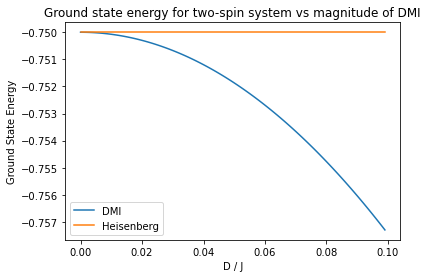

In [3]:
dD = 100

Dmag = np.zeros(dD)
energy = np.zeros(dD)
splitting = np.zeros(dD)

nsites = 2
m = 2**nsites  # To make it easier to change the number of sites
J = 1.

vD = np.zeros(shape=(m,m))
vH = np.zeros(shape=(m,m))

# Get energies for the non-zero DMI

for j in range(dD):
    Dmag[j] = dD*j*0.00001
    
    Dx = dD*j*0.00001j  
    Dy = dD*j*0.00001
    Dz = dD*j*0.00001j

    sz0 = np.zeros(shape=(2,2)) 
    splus0 = np.zeros(shape=(2,2)) 
    sz0[0,0]         =  0.5
    sz0[1,1]         =  -0.5
    splus0[1,0]      =  1.0
    sminus0 = np.transpose(splus0)

    Ising = np.zeros(shape=(4,4)) 
    Ising = np.kron(sz0,sz0)

    JDp = np.zeros(shape=(2,2))
    JDm = np.zeros(shape=(2,2))

    JDp = (0.5)*(J + Dz)*np.kron(splus0,sminus0)
    JDm = (0.5)*(J - Dz)*np.kron(sminus0,splus0)

    DMx = -Dx*(0.5)*(-np.kron(sz0,splus0) + np.kron(sz0,sminus0) + np.kron(splus0,sz0) - np.kron(sminus0,sz0))
    DMy = Dy*(0.5)*(np.kron(splus0,sz0) + np.kron(sminus0,sz0) - np.kron(sz0,splus0) - np.kron(sz0,sminus0))

    h2 = Ising + JDp + JDm + DMx + DMy

    H = np.zeros(shape=(2,2))
    for i in range(1,nsites):

        diml = 2**(i-1)        # 2^i
        dim = diml*2
    
        #print ("ADDING SITE ",i," DIML= ",diml)

        Ileft = np.eye(diml)
        Iright = np.eye(2)


        aux = np.zeros(shape=(dim,dim))
        aux = np.kron(H,Iright)
        H = aux

        H = H + np.kron(Ileft,h2)
    
    
    w, vD = np.linalg.eigh(H) 
    #print(w[0])
    
    energy[j] = w[0]
    #splitting[j] = w[3] - w[2]
    
 
# Get energy for the zero DMI case (Heisenberg)

energyH = np.zeros(dD)

for j in range(dD):
    Dmag[j] = dD*j*0.00001
    
    Dx = dD*0  # No DMI
    Dy = dD*0
    Dz = dD*0

    sz0 = np.zeros(shape=(2,2)) 
    splus0 = np.zeros(shape=(2,2)) 
    sz0[0,0]         =  0.5
    sz0[1,1]         =  -0.5
    splus0[1,0]      =  1.0
    sminus0 = np.transpose(splus0)

    Ising = np.zeros(shape=(4,4)) 
    Ising = np.kron(sz0,sz0)

    JDp = np.zeros(shape=(2,2))
    JDm = np.zeros(shape=(2,2))

    JDp = (0.5)*(J + Dz)*np.kron(splus0,sminus0)
    JDm = (0.5)*(J - Dz)*np.kron(sminus0,splus0)

    DMx = -Dx*(0.5)*(-np.kron(sz0,splus0) + np.kron(sz0,sminus0) + np.kron(splus0,sz0) - np.kron(sminus0,sz0))
    DMy = Dy*(0.5)*(np.kron(splus0,sz0) + np.kron(sminus0,sz0) - np.kron(sz0,splus0) - np.kron(sz0,sminus0))

    h2 = Ising + JDp + JDm + DMx + DMy

    H = np.zeros(shape=(2,2))
    for i in range(1,nsites):

        diml = 2**(i-1)        # 2^i
        dim = diml*2
    
        #print ("ADDING SITE ",i," DIML= ",diml)

        Ileft = np.eye(diml)
        Iright = np.eye(2)


        aux = np.zeros(shape=(dim,dim))
        aux = np.kron(H,Iright)
        H = aux

        H = H + np.kron(Ileft,h2)
    
    
    w, vH = np.linalg.eigh(H) 
    #print(w[0])
    
    energyH[j] = w[0]
    #splitting[j] = w[3] - w[2]


vD = vD.round(3)    
vH = vH.round(3)

pyplot.plot(Dmag, energy);

pyplot.xlabel('D / J')
pyplot.ylabel("Ground State Energy")
pyplot.title("Ground state energy for two-spin system vs magnitude of DMI");

pyplot.plot(Dmag, energyH);

pyplot.legend(['DMI','Heisenberg']);


print(f'The eigenvectors for DMI (at max value calculated) are:')
print()
print(vD)
print()

print()
print(f'The eigenvectors for Heisenberg are: ')
print()
print(vH)
print()


What's happening? We see that as we turn the DMI on, the ground state energy is lowered. I think we can intuitively compare to two things: classical case, and quantum particle in a box. 

Classical case: pretty simple. The neighboring spins can adopt a new orientation with a non-zero cross product, and this lowers the energy. We see, for example, that the singlet state goes to some nontrivial ground state as we turn on the DMI. The component states are not just anti-aligned. They have some amplitude to me measured pointing in the same direction, which we can read off from the ground state vector.

Particle in a box: recall that the particle in a box can lower its energy by increasing the length of the box, or the area over which it can wander. Here I think a similar phenomena is happening, but rather than allowing the electrons a larger region in which to tunnel, we are offering them more ways to tunnel. Fundamentally, this proceeds by turning on SOC - we allow even aligned states to lower their energy, because an electron that is spin up is no longer stuck where it is if its neighbors are spin up. SOC provides a way for the spin to rotate as it tunnels to its neighbor. Thus, these particles have more ways to spread themselves out, and the energy is lowered. Or, maybe better put, there is a new ground state with defined energy lower than the previous ground state, and the new configuration accounts for these new ways in which particles can spread themselves out.

Can we watch the ground state change as we turn on the DMI?

In [4]:
dD = 20

Dmag = np.zeros(dD)
energy = np.zeros(dD)
splitting = np.zeros(dD)

nsites = 2
m = 2**nsites  # To make it easier to change the number of sites
J = 1.

vD = np.zeros(shape=(m,m))
vH = np.zeros(shape=(m,m))



for j in range(dD):
    Dmag[j] = dD*j*0.0001
    
    Dx = dD*j*0.0001j  
    Dy = dD*j*0.0001
    Dz = dD*j*0.0001j

    sz0 = np.zeros(shape=(2,2)) 
    splus0 = np.zeros(shape=(2,2)) 
    sz0[0,0]         =  0.5
    sz0[1,1]         =  -0.5
    splus0[1,0]      =  1.0
    sminus0 = np.transpose(splus0)

    Ising = np.zeros(shape=(4,4)) 
    Ising = np.kron(sz0,sz0)

    JDp = np.zeros(shape=(2,2))
    JDm = np.zeros(shape=(2,2))

    JDp = (0.5)*(J + Dz)*np.kron(splus0,sminus0)
    JDm = (0.5)*(J - Dz)*np.kron(sminus0,splus0)

    DMx = -Dx*(0.5)*(-np.kron(sz0,splus0) + np.kron(sz0,sminus0) + np.kron(splus0,sz0) - np.kron(sminus0,sz0))
    DMy = Dy*(0.5)*(np.kron(splus0,sz0) + np.kron(sminus0,sz0) - np.kron(sz0,splus0) - np.kron(sz0,sminus0))

    h2 = Ising + JDp + JDm + DMx + DMy

    H = np.zeros(shape=(2,2))
    for i in range(1,nsites):

        diml = 2**(i-1)        # 2^i
        dim = diml*2
    
        #print ("ADDING SITE ",i," DIML= ",diml)

        Ileft = np.eye(diml)
        Iright = np.eye(2)


        aux = np.zeros(shape=(dim,dim))
        aux = np.kron(H,Iright)
        H = aux

        H = H + np.kron(Ileft,h2)
    
    
    w, vD = np.linalg.eigh(H) 
    
    
    vD = vD.round(3)    

    print(f"D/J = {Dmag[j]}:")
    print()
    print(vD)
    print()
    print()
    
    energy[j] = w[0]
    
    



D/J = 0.0:

[[ 0.   +0.j  1.   +0.j  0.   +0.j  0.   +0.j]
 [ 0.707+0.j  0.   +0.j  0.707+0.j  0.   +0.j]
 [-0.707+0.j  0.   +0.j  0.707+0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  1.   +0.j]]


D/J = 0.002:

[[ 0.001-0.j     0.588+0.j    -0.567+0.j    -0.577+0.j   ]
 [ 0.499-0.5j    0.449+0.318j  0.171+0.036j  0.29 +0.288j]
 [-0.5  +0.499j  0.449+0.318j  0.171+0.036j  0.288+0.29j ]
 [ 0.   -0.001j -0.131-0.179j -0.136-0.774j  0.   +0.577j]]


D/J = 0.004:

[[ 0.002+0.j     0.8  +0.j    -0.161-0.j    -0.577-0.j   ]
 [ 0.499-0.501j  0.111+0.159j -0.485-0.246j  0.29 +0.287j]
 [-0.501+0.499j  0.111+0.159j -0.485-0.246j  0.287+0.29j ]
 [-0.   -0.002j  0.048+0.531j  0.239+0.57j  -0.   +0.577j]]


D/J = 0.006:

[[ 0.003-0.j     0.518+0.j    -0.632+0.j    -0.577+0.j   ]
 [ 0.498-0.501j  0.471+0.31j   0.122-0.01j   0.291+0.286j]
 [-0.501+0.498j  0.471+0.31j   0.122-0.01j   0.286+0.291j]
 [ 0.   -0.003j -0.161-0.264j -0.132-0.744j  0.   +0.577j]]


D/J = 0.008:

[[ 0.004-0.j     0.408+0

Interestingly, the first thing that happens to the singlet is that it takes complex amplitudes. For very small D/J, the amplitudes for the anti-aligned states are complex, but the amplitudes for aligned states remain very small. 

In [5]:
np.absolute(vD[1,0])**2

0.49918100000000004

For the ground state, plot the probability of measuring the spins to be aligned in the z (either both up or both down) at various values of D/J.

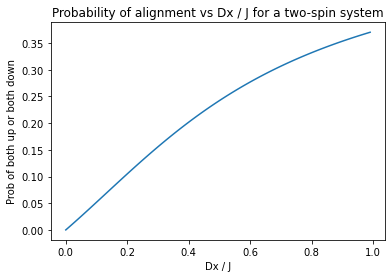

In [19]:
dD = 100

Dmag = np.zeros(dD)
energy = np.zeros(dD)


nsites = 2
m = 2**nsites  # To make it easier to change the number of sites
J = 1.

vD = np.zeros(shape=(m,m))
vH = np.zeros(shape=(m,m))

probs = np.zeros(dD)

for j in range(dD):
    Dmag[j] = dD*j*0.0001
    
    Dx = dD*j*0.0001j  
    Dy = dD*j*0.0001
    Dz = dD*j*0.0001j

    sz0 = np.zeros(shape=(2,2)) 
    splus0 = np.zeros(shape=(2,2)) 
    sz0[0,0]         =  0.5
    sz0[1,1]         =  -0.5
    splus0[1,0]      =  1.0
    sminus0 = np.transpose(splus0)

    Ising = np.zeros(shape=(4,4)) 
    Ising = np.kron(sz0,sz0)

    JDp = np.zeros(shape=(2,2))
    JDm = np.zeros(shape=(2,2))

    JDp = (0.5)*(J + Dz)*np.kron(splus0,sminus0)
    JDm = (0.5)*(J - Dz)*np.kron(sminus0,splus0)

    DMx = -Dx*(0.5)*(-np.kron(sz0,splus0) + np.kron(sz0,sminus0) + np.kron(splus0,sz0) - np.kron(sminus0,sz0))
    DMy = Dy*(0.5)*(np.kron(splus0,sz0) + np.kron(sminus0,sz0) - np.kron(sz0,splus0) - np.kron(sz0,sminus0))

    h2 = Ising + JDp + JDm + DMx + DMy

    H = np.zeros(shape=(2,2))
    for i in range(1,nsites):

        diml = 2**(i-1)        # 2^i
        dim = diml*2
    
        #print ("ADDING SITE ",i," DIML= ",diml)

        Ileft = np.eye(diml)
        Iright = np.eye(2)


        aux = np.zeros(shape=(dim,dim))
        aux = np.kron(H,Iright)
        H = aux

        H = H + np.kron(Ileft,h2)
    
    
    w, vD = np.linalg.eigh(H) 
    
    probs[j] = np.absolute(vD[0,0])**2 + np.absolute(vD[3,0])
    
    #vD = vD.round(3)    

    
    energy[j] = w[0]
    
    
pyplot.plot(Dmag, probs)
pyplot.title("Probability of alignment vs Dx / J for a two-spin system") ## This is for Dx = Dy = Dz
pyplot.xlabel('Dx / J')
pyplot.ylabel('Prob of both up or both down');



What about letting D become larger than J (which realistically shouldn't happen, because D is perturbative and should be an order of magnitude smaller than J)?

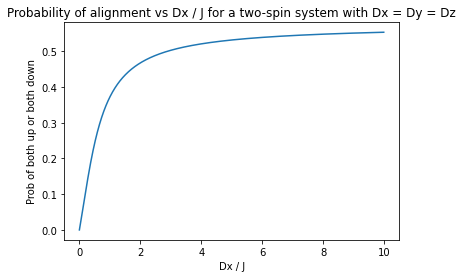

In [18]:
dD = 1000

Dmag = np.zeros(dD)
energy = np.zeros(dD)


nsites = 2
m = 2**nsites  # To make it easier to change the number of sites
J = 1.

vD = np.zeros(shape=(m,m))
vH = np.zeros(shape=(m,m))

probs = np.zeros(dD)

for j in range(dD):
    Dmag[j] = dD*j*0.00001
    
    Dx = dD*j*0.00001j  
    Dy = dD*j*0.00001
    Dz = dD*j*0.00001j

    sz0 = np.zeros(shape=(2,2)) 
    splus0 = np.zeros(shape=(2,2)) 
    sz0[0,0]         =  0.5
    sz0[1,1]         =  -0.5
    splus0[1,0]      =  1.0
    sminus0 = np.transpose(splus0)

    Ising = np.zeros(shape=(4,4)) 
    Ising = np.kron(sz0,sz0)

    JDp = np.zeros(shape=(2,2))
    JDm = np.zeros(shape=(2,2))

    JDp = (0.5)*(J + Dz)*np.kron(splus0,sminus0)
    JDm = (0.5)*(J - Dz)*np.kron(sminus0,splus0)

    DMx = -Dx*(0.5)*(-np.kron(sz0,splus0) + np.kron(sz0,sminus0) + np.kron(splus0,sz0) - np.kron(sminus0,sz0))
    DMy = Dy*(0.5)*(np.kron(splus0,sz0) + np.kron(sminus0,sz0) - np.kron(sz0,splus0) - np.kron(sz0,sminus0))

    h2 = Ising + JDp + JDm + DMx + DMy

    H = np.zeros(shape=(2,2))
    for i in range(1,nsites):

        diml = 2**(i-1)        # 2^i
        dim = diml*2
    
        #print ("ADDING SITE ",i," DIML= ",diml)

        Ileft = np.eye(diml)
        Iright = np.eye(2)


        aux = np.zeros(shape=(dim,dim))
        aux = np.kron(H,Iright)
        H = aux

        H = H + np.kron(Ileft,h2)
    
    
    w, vD = np.linalg.eigh(H) 
    
    probs[j] = np.absolute(vD[0,0])**2 + np.absolute(vD[3,0])
    
    #vD = vD.round(3)    

    
    energy[j] = w[0]
    
    
pyplot.plot(Dmag, probs)
pyplot.title("Probability of alignment vs Dx / J for a two-spin system with Dx = Dy = Dz")
pyplot.xlabel('Dx / J')
pyplot.ylabel('Prob of both up or both down');




What if now we vary the direction of D rather than the magnitude? Choose D / J = .1 and rotate the D vector. 

Note that a vector with magnitude D can be represented in spherical coorinates as $D_x = D\sin{\theta}\cos{\phi}$, $D_y = D\sin{\theta}\sin{\phi}$, $D_z = D\cos{\theta}$.

Need two loops that run through $\theta$ in $[0, \pi]$ and $\phi$ in $[0, 2\pi]$.

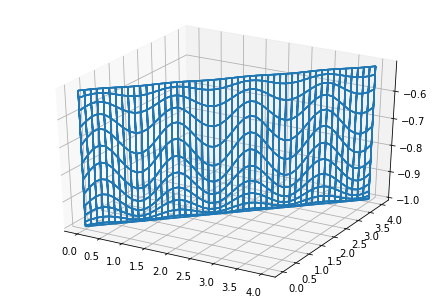

[0.         0.08163265 0.16326531 0.24489796 0.32653061 0.40816327
 0.48979592 0.57142857 0.65306122 0.73469388 0.81632653 0.89795918
 0.97959184 1.06122449 1.14285714 1.2244898  1.30612245 1.3877551
 1.46938776 1.55102041 1.63265306 1.71428571 1.79591837 1.87755102
 1.95918367 2.04081633 2.12244898 2.20408163 2.28571429 2.36734694
 2.44897959 2.53061224 2.6122449  2.69387755 2.7755102  2.85714286
 2.93877551 3.02040816 3.10204082 3.18367347 3.26530612 3.34693878
 3.42857143 3.51020408 3.59183673 3.67346939 3.75510204 3.83673469
 3.91836735 4.        ]

[0.         0.08163265 0.16326531 0.24489796 0.32653061 0.40816327
 0.48979592 0.57142857 0.65306122 0.73469388 0.81632653 0.89795918
 0.97959184 1.06122449 1.14285714 1.2244898  1.30612245 1.3877551
 1.46938776 1.55102041 1.63265306 1.71428571 1.79591837 1.87755102
 1.95918367 2.04081633 2.12244898 2.20408163 2.28571429 2.36734694
 2.44897959 2.53061224 2.6122449  2.69387755 2.7755102  2.85714286
 2.93877551 3.02040816 3.10204082 3.183

In [8]:
steps = 50

ground_array = np.zeros(shape=(steps,steps))

nsites = 2
J = 1.
D = 0.5
T = 4   # number of pi's we're cycling through

for j in range(steps): # outer loop for theta
    
    theta = j*T*np.pi/steps
    
    
    for k in range(steps): # inner loop for phi
        
        phi = k*np.pi*T/steps
    
    
        Dx = D*np.sin(theta)*np.cos(phi)     # Allowing D vector to vary direction in each loop
        Dy = D*np.sin(theta)*np.sin(phi)
        Dz = D*np.cos(theta)

        sz0 = np.zeros(shape=(2,2)) 
        splus0 = np.zeros(shape=(2,2)) 
        sz0[0,0]         =  0.5
        sz0[1,1]         =  -0.5
        splus0[1,0]      =  1.0
        sminus0 = np.transpose(splus0)

        Ising = np.zeros(shape=(4,4)) 
        Ising = np.kron(sz0,sz0)

        JDp = np.zeros(shape=(2,2))
        JDm = np.zeros(shape=(2,2))

        JDp = (0.5)*(J + Dz)*np.kron(splus0,sminus0)
        JDm = (0.5)*(J - Dz)*np.kron(sminus0,splus0)

        DMx = -Dx*(0.5)*(-np.kron(sz0,splus0) + np.kron(sz0,sminus0) + np.kron(splus0,sz0) - np.kron(sminus0,sz0))
        DMy = Dy*(0.5)*(np.kron(splus0,sz0) + np.kron(sminus0,sz0) - np.kron(sz0,splus0) - np.kron(sz0,sminus0))

        h2 = Ising + JDp + JDm + DMx + DMy

        H = np.zeros(shape=(2,2))
        for i in range(1,nsites):

            diml = 2**(i-1)        # 2^i
            dim = diml*2
    
            #print ("ADDING SITE ",i," DIML= ",diml)

            Ileft = np.eye(diml)
            Iright = np.eye(2)


            aux = np.zeros(shape=(dim,dim))
            aux = np.kron(H,Iright)
            H = aux

            H = H + np.kron(Ileft,h2)
    
    
        w, v = np.linalg.eigh(H) 
          
    
        ground_array[j, k] = w[0]  # This is going to be a 2D array, j -> which theta, k -> which phi
           


from mpl_toolkits.mplot3d import Axes3D 
a = np.pi
b = T*a

theta_array = np.linspace(0,T,steps)
phi_array = np.linspace(0,T,steps)

fig = pyplot.figure()
ax = Axes3D(fig)
ax.plot_wireframe(theta_array, phi_array, ground_array, rstride=1, cstride=1) 
pyplot.show()



print(theta_array)
print()
print(phi_array)
print()
print(ground_array)

The above actually looks like it's plotting cross sections of lots of surfaces. It looks like it's always evaluating along a line where phi = theta, not over all phi and all theta. I need to look at the code more carefully to see why this is.

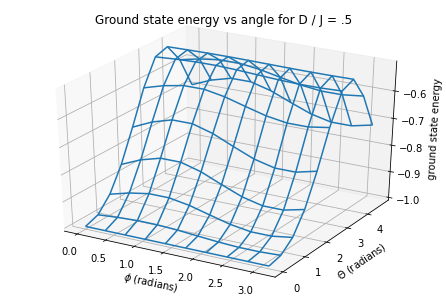

[[0.         0.34906585 0.6981317  1.04719755 1.3962634  1.74532925
  2.0943951  2.44346095 2.7925268  3.14159265]
 [0.         0.34906585 0.6981317  1.04719755 1.3962634  1.74532925
  2.0943951  2.44346095 2.7925268  3.14159265]
 [0.         0.34906585 0.6981317  1.04719755 1.3962634  1.74532925
  2.0943951  2.44346095 2.7925268  3.14159265]
 [0.         0.34906585 0.6981317  1.04719755 1.3962634  1.74532925
  2.0943951  2.44346095 2.7925268  3.14159265]
 [0.         0.34906585 0.6981317  1.04719755 1.3962634  1.74532925
  2.0943951  2.44346095 2.7925268  3.14159265]
 [0.         0.34906585 0.6981317  1.04719755 1.3962634  1.74532925
  2.0943951  2.44346095 2.7925268  3.14159265]
 [0.         0.34906585 0.6981317  1.04719755 1.3962634  1.74532925
  2.0943951  2.44346095 2.7925268  3.14159265]
 [0.         0.34906585 0.6981317  1.04719755 1.3962634  1.74532925
  2.0943951  2.44346095 2.7925268  3.14159265]
 [0.         0.34906585 0.6981317  1.04719755 1.3962634  1.74532925
  2.0943951 

In [9]:
steps = 10

ground_array = np.zeros(shape=(steps,steps))

nsites = 2
J = 1.
D = 0.5
T = 2   # number of pi's we're cycling through

for j in range(steps): # outer loop for theta
    
    theta = (j*(T/2)*np.pi/steps)*1.5
    
    
    for k in range(steps): # inner loop for phi
        
        phi = k*np.pi*(T/2)/steps
    
    
        Dx = D*np.sin(theta)*np.cos(phi)     # Allowing D vector to vary direction in each loop
        Dy = D*np.sin(theta)*np.sin(phi)
        Dz = D*np.cos(theta)

        sz0 = np.zeros(shape=(2,2)) 
        splus0 = np.zeros(shape=(2,2)) 
        sz0[0,0]         =  0.5
        sz0[1,1]         =  -0.5
        splus0[1,0]      =  1.0
        sminus0 = np.transpose(splus0)

        Ising = np.zeros(shape=(4,4)) 
        Ising = np.kron(sz0,sz0)

        JDp = np.zeros(shape=(2,2))
        JDm = np.zeros(shape=(2,2))

        JDp = (0.5)*(J + Dz)*np.kron(splus0,sminus0)
        JDm = (0.5)*(J - Dz)*np.kron(sminus0,splus0)

        DMx = -Dx*(0.5)*(-np.kron(sz0,splus0) + np.kron(sz0,sminus0) + np.kron(splus0,sz0) - np.kron(sminus0,sz0))
        DMy = Dy*(0.5)*(np.kron(splus0,sz0) + np.kron(sminus0,sz0) - np.kron(sz0,splus0) - np.kron(sz0,sminus0))

        h2 = Ising + JDp + JDm + DMx + DMy

        H = np.zeros(shape=(2,2))
        for i in range(1,nsites):

            diml = 2**(i-1)        # 2^i
            dim = diml*2
    
            #print ("ADDING SITE ",i," DIML= ",diml)

            Ileft = np.eye(diml)
            Iright = np.eye(2)


            aux = np.zeros(shape=(dim,dim))
            aux = np.kron(H,Iright)
            H = aux

            H = H + np.kron(Ileft,h2)
    
    
        w, v = np.linalg.eigh(H) 
          
    
        ground_array[j, k] = w[0]  # This is going to be a 2D array, j -> which theta, k -> which phi
           


from mpl_toolkits.mplot3d import Axes3D 
a = np.pi
b = T*a

theta_array = np.linspace(0,a,steps)   # 1D arrays
phi_array = np.linspace(0,a*1.5,steps)     # Not sure why it's seeming like the way I'm defining these is flipped

# Now build the 2D arrays
theta_array2 = np.zeros(shape=(steps,steps))
phi_array2 = np.zeros(shape=(steps,steps))

for i in range(steps):
    for j in range(steps):
        theta_array2[i,j] = theta_array[j]
        phi_array2[i,j] = phi_array[j]

#ground_array = ground_array.transpose()
#theta_array2 = theta_array2.transpose()
phi_array2 = phi_array2.transpose()        # This transpose is what I needed to make the axes make sense!

       
fig = pyplot.figure()
ax = Axes3D(fig)
ax.set_xlabel('$\phi$ (radians)')
ax.set_ylabel('$\Theta$ (radians)')
ax.set_zlabel('ground state energy')
ax.set_title('Ground state energy vs angle for D / J = .5')
ax.plot_wireframe(theta_array2, phi_array2, ground_array, rstride=1, cstride=1) 


pyplot.show()




print(theta_array2)
print()
print(phi_array2)
#print()
#print(phi_array)
print()
print(ground_array)


# check that at theta = 0, we should have a flat line at some value because there's no phi dependence.

Here is some tutorial code from Matplotlib. I'll use it to troubleshoot my own.

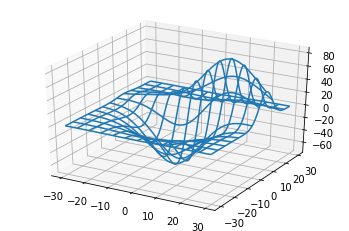

X array is
[[-30.  -29.5 -29.  ...  28.5  29.   29.5]
 [-30.  -29.5 -29.  ...  28.5  29.   29.5]
 [-30.  -29.5 -29.  ...  28.5  29.   29.5]
 ...
 [-30.  -29.5 -29.  ...  28.5  29.   29.5]
 [-30.  -29.5 -29.  ...  28.5  29.   29.5]
 [-30.  -29.5 -29.  ...  28.5  29.   29.5]]

Y array is
[[-30.  -30.  -30.  ... -30.  -30.  -30. ]
 [-29.5 -29.5 -29.5 ... -29.5 -29.5 -29.5]
 [-29.  -29.  -29.  ... -29.  -29.  -29. ]
 ...
 [ 28.5  28.5  28.5 ...  28.5  28.5  28.5]
 [ 29.   29.   29.  ...  29.   29.   29. ]
 [ 29.5  29.5  29.5 ...  29.5  29.5  29.5]]

Z array is
[[-0.00982064 -0.0113957  -0.01319036 ... -0.01522953 -0.01319036
  -0.0113957 ]
 [-0.0113957  -0.01322338 -0.01530587 ... -0.01767209 -0.01530587
  -0.01322338]
 [-0.01319036 -0.01530587 -0.01771632 ... -0.02045518 -0.01771632
  -0.01530587]
 ...
 [-0.01200234 -0.01414685 -0.01660867 ...  0.02918791  0.03019517
   0.03085725]
 [-0.01097235 -0.01288301 -0.01507265 ...  0.01583738  0.01709512
   0.01804782]
 [-0.00988645 -0.01157475 -

In [10]:
'''
=================
3D wireframe plot
=================

A very basic demonstration of a wireframe plot.
'''

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)
#Z = Z.transpose()

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()
print('X array is')
print(X)
print()
print('Y array is')
print(Y)
print()
print('Z array is')
print(Z)


Ok, it's clear that X and Y aren't just linear arrays. They actually need to be 2D.

This means my theta_array, for example, needs to be repeated as a row 'steps' number of times.

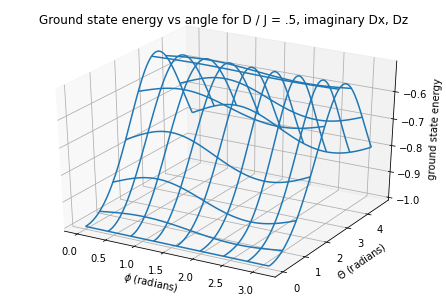

[[0.         0.039767   0.07953399 ... 3.06205866 3.10182566 3.14159265]
 [0.         0.039767   0.07953399 ... 3.06205866 3.10182566 3.14159265]
 [0.         0.039767   0.07953399 ... 3.06205866 3.10182566 3.14159265]
 ...
 [0.         0.039767   0.07953399 ... 3.06205866 3.10182566 3.14159265]
 [0.         0.039767   0.07953399 ... 3.06205866 3.10182566 3.14159265]
 [0.         0.039767   0.07953399 ... 3.06205866 3.10182566 3.14159265]]

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.05965049 0.05965049 0.05965049 ... 0.05965049 0.05965049 0.05965049]
 [0.11930099 0.11930099 0.11930099 ... 0.11930099 0.11930099 0.11930099]
 ...
 [4.59308799 4.59308799 4.59308799 ... 4.59308799 4.59308799 4.59308799]
 [4.65273849 4.65273849 4.65273849 ... 4.65273849 4.65273849 4.65273849]
 [4.71238898 4.71238898 4.71238898 ... 4.71238898 4.71238898 4.71238898]]

[[-1.         -1.         -1.         ... -1.         -1.
  -1.        ]
 [-0.99973973 -0.99972613 -0.99971262

In [11]:
steps = 80

ground_array = np.zeros(shape=(steps,steps))

nsites = 2
J = 1.
D = 0.5
T = 2   # number of pi's we're cycling through

for j in range(steps): # outer loop for theta
    
    theta = (j*(T/2)*np.pi/steps)*1.5
    
    
    for k in range(steps): # inner loop for phi
        
        phi = k*np.pi*(T/2)/steps
    
    
        Dx = D*np.sin(theta)*np.cos(phi)     # Allowing D vector to vary direction in each loop
        Dy = D*np.sin(theta)*np.sin(phi)
        Dz = D*np.cos(theta)

        sz0 = np.zeros(shape=(2,2)) 
        splus0 = np.zeros(shape=(2,2)) 
        sz0[0,0]         =  0.5
        sz0[1,1]         =  -0.5
        splus0[1,0]      =  1.0
        sminus0 = np.transpose(splus0)

        Ising = np.zeros(shape=(4,4)) 
        Ising = np.kron(sz0,sz0)

        JDp = np.zeros(shape=(2,2))
        JDm = np.zeros(shape=(2,2))

        JDp = (0.5)*(J + Dz)*np.kron(splus0,sminus0)
        JDm = (0.5)*(J - Dz)*np.kron(sminus0,splus0)

        DMx = -Dx*(0.5)*(-np.kron(sz0,splus0) + np.kron(sz0,sminus0) + np.kron(splus0,sz0) - np.kron(sminus0,sz0))
        DMy = Dy*(0.5)*(np.kron(splus0,sz0) + np.kron(sminus0,sz0) - np.kron(sz0,splus0) - np.kron(sz0,sminus0))

        h2 = Ising + JDp + JDm + DMx + DMy

        H = np.zeros(shape=(2,2))
        for i in range(1,nsites):

            diml = 2**(i-1)        # 2^i
            dim = diml*2
    
            #print ("ADDING SITE ",i," DIML= ",diml)

            Ileft = np.eye(diml)
            Iright = np.eye(2)


            aux = np.zeros(shape=(dim,dim))
            aux = np.kron(H,Iright)
            H = aux

            H = H + np.kron(Ileft,h2)
    
    
        w, v = np.linalg.eigh(H) 
          
    
        ground_array[j, k] = w[0]  # This is going to be a 2D array, j -> which theta, k -> which phi
           


from mpl_toolkits.mplot3d import Axes3D 
a = np.pi
b = T*a

theta_array = np.linspace(0,a,steps)   # 1D arrays
phi_array = np.linspace(0,a*1.5,steps)     # Not sure why it's seeming like the way I'm defining these is flipped

# Now build the 2D arrays
theta_array2 = np.zeros(shape=(steps,steps))
phi_array2 = np.zeros(shape=(steps,steps))

for i in range(steps):
    for j in range(steps):
        theta_array2[i,j] = theta_array[j]
        phi_array2[i,j] = phi_array[j]

#ground_array = ground_array.transpose()
#theta_array2 = theta_array2.transpose()
phi_array2 = phi_array2.transpose()        # This transpose is what I needed to make the axes make sense!

       
fig = pyplot.figure()
ax = Axes3D(fig)
ax.set_xlabel('$\phi$ (radians)')
ax.set_ylabel('$\Theta$ (radians)')
ax.set_zlabel('ground state energy')
ax.set_title('Ground state energy vs angle for D / J = .5, imaginary Dx, Dz')
ax.plot_wireframe(theta_array2, phi_array2, ground_array, rstride=10, cstride=10) 


pyplot.show()




print(theta_array2)
print()
print(phi_array2)
#print()
#print(phi_array)
print()
print(ground_array)


# check that at theta = 0, we should have a flat line at some value because there's no phi dependence.

Quick(ish) check: what if we pick a $\phi$ and only vary $\theta$? Will we get the expected profile that we see from these plots?

In [12]:
dD = 20

Dmag = np.zeros(dD)
energy = np.zeros(dD)
splitting = np.zeros(dD)

nsites = 2
m = 2**nsites  # To make it easier to change the number of sites
J = 1.

vD = np.zeros(shape=(m,m))
vH = np.zeros(shape=(m,m))



for j in range(dD):
    Dmag[j] = dD*j*0.0001
    
    Dx = D*np.sin(theta)*np.cos(phi)     # Allowing D vector to vary direction in each loop
    Dy = D*np.sin(theta)*np.sin(phi)
    Dz = D*np.cos(theta)

    sz0 = np.zeros(shape=(2,2)) 
    splus0 = np.zeros(shape=(2,2)) 
    sz0[0,0]         =  0.5
    sz0[1,1]         =  -0.5
    splus0[1,0]      =  1.0
    sminus0 = np.transpose(splus0)

    Ising = np.zeros(shape=(4,4)) 
    Ising = np.kron(sz0,sz0)

    JDp = np.zeros(shape=(2,2))
    JDm = np.zeros(shape=(2,2))

    JDp = (0.5)*(J + Dz)*np.kron(splus0,sminus0)
    JDm = (0.5)*(J - Dz)*np.kron(sminus0,splus0)

    DMx = -Dx*(0.5)*(-np.kron(sz0,splus0) + np.kron(sz0,sminus0) + np.kron(splus0,sz0) - np.kron(sminus0,sz0))
    DMy = Dy*(0.5)*(np.kron(splus0,sz0) + np.kron(sminus0,sz0) - np.kron(sz0,splus0) - np.kron(sz0,sminus0))

    h2 = Ising + JDp + JDm + DMx + DMy

    H = np.zeros(shape=(2,2))
    for i in range(1,nsites):

        diml = 2**(i-1)        # 2^i
        dim = diml*2
    
        #print ("ADDING SITE ",i," DIML= ",diml)

        Ileft = np.eye(diml)
        Iright = np.eye(2)


        aux = np.zeros(shape=(dim,dim))
        aux = np.kron(H,Iright)
        H = aux

        H = H + np.kron(Ileft,h2)
    
    
    w, vD = np.linalg.eigh(H) 
    
    
    vD = vD.round(3)    

    print(f"D/J = {Dmag[j]}:")
    print()
    print(vD)
    print()
    print()
    
    energy[j] = w[0]
    
    




D/J = 0.0:

[[ 0.17  -0.    -0.707 -0.686]
 [-0.686  0.707 -0.    -0.17 ]
 [ 0.686  0.707 -0.     0.17 ]
 [ 0.17   0.     0.707 -0.686]]


D/J = 0.002:

[[ 0.17  -0.    -0.707 -0.686]
 [-0.686  0.707 -0.    -0.17 ]
 [ 0.686  0.707 -0.     0.17 ]
 [ 0.17   0.     0.707 -0.686]]


D/J = 0.004:

[[ 0.17  -0.    -0.707 -0.686]
 [-0.686  0.707 -0.    -0.17 ]
 [ 0.686  0.707 -0.     0.17 ]
 [ 0.17   0.     0.707 -0.686]]


D/J = 0.006:

[[ 0.17  -0.    -0.707 -0.686]
 [-0.686  0.707 -0.    -0.17 ]
 [ 0.686  0.707 -0.     0.17 ]
 [ 0.17   0.     0.707 -0.686]]


D/J = 0.008:

[[ 0.17  -0.    -0.707 -0.686]
 [-0.686  0.707 -0.    -0.17 ]
 [ 0.686  0.707 -0.     0.17 ]
 [ 0.17   0.     0.707 -0.686]]


D/J = 0.01:

[[ 0.17  -0.    -0.707 -0.686]
 [-0.686  0.707 -0.    -0.17 ]
 [ 0.686  0.707 -0.     0.17 ]
 [ 0.17   0.     0.707 -0.686]]


D/J = 0.012:

[[ 0.17  -0.    -0.707 -0.686]
 [-0.686  0.707 -0.    -0.17 ]
 [ 0.686  0.707 -0.     0.17 ]
 [ 0.17   0.     0.707 -0.686]]


D/J = 0.014:

[[

Before going on: noticed an error. My Dx and Dz should be imaginary, the way I've defined things.

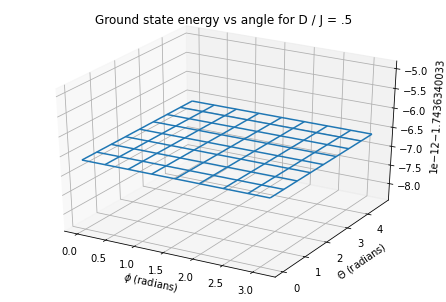

[[0.         0.039767   0.07953399 ... 3.06205866 3.10182566 3.14159265]
 [0.         0.039767   0.07953399 ... 3.06205866 3.10182566 3.14159265]
 [0.         0.039767   0.07953399 ... 3.06205866 3.10182566 3.14159265]
 ...
 [0.         0.039767   0.07953399 ... 3.06205866 3.10182566 3.14159265]
 [0.         0.039767   0.07953399 ... 3.06205866 3.10182566 3.14159265]
 [0.         0.039767   0.07953399 ... 3.06205866 3.10182566 3.14159265]]

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.05965049 0.05965049 0.05965049 ... 0.05965049 0.05965049 0.05965049]
 [0.11930099 0.11930099 0.11930099 ... 0.11930099 0.11930099 0.11930099]
 ...
 [4.59308799 4.59308799 4.59308799 ... 4.59308799 4.59308799 4.59308799]
 [4.65273849 4.65273849 4.65273849 ... 4.65273849 4.65273849 4.65273849]
 [4.71238898 4.71238898 4.71238898 ... 4.71238898 4.71238898 4.71238898]]

[[-1.743634 -1.743634 -1.743634 ... -1.743634 -1.743634 -1.743634]
 [-1.743634 -1.743634 -1.743634 ... -1.7436

In [13]:
steps = 80

ground_array = np.zeros(shape=(steps,steps))

nsites = 4
J = 1.
D = .5
T = 2   # number of pi's we're cycling through

for j in range(steps): # outer loop for theta
    
    theta = (j*(T/2)*np.pi/steps)*1.5
    
    
    for k in range(steps): # inner loop for phi
        
        phi = k*np.pi*(T/2)/steps
    
    
        Dx = D*np.sin(theta)*np.cos(phi)     # Allowing D vector to vary direction in each loop
        Dy = D*np.sin(theta)*np.sin(phi)
        Dz = D*np.cos(theta)

        sz0 = np.zeros(shape=(2,2)) 
        splus0 = np.zeros(shape=(2,2)) 
        sz0[0,0]         =  0.5
        sz0[1,1]         =  -0.5
        splus0[1,0]      =  1.0
        sminus0 = np.transpose(splus0)

        Ising = np.zeros(shape=(4,4)) 
        Ising = np.kron(sz0,sz0)

        JDp = np.zeros(shape=(2,2))
        JDm = np.zeros(shape=(2,2))

        JDp = (0.5)*(J + Dz*1j)*np.kron(splus0,sminus0)
        JDm = (0.5)*(J - Dz*1j)*np.kron(sminus0,splus0)

        DMx = -Dx*(0.5)*1j*(-np.kron(sz0,splus0) + np.kron(sz0,sminus0) + np.kron(splus0,sz0) - np.kron(sminus0,sz0))
        DMy = Dy*(0.5)*(np.kron(splus0,sz0) + np.kron(sminus0,sz0) - np.kron(sz0,splus0) - np.kron(sz0,sminus0))

        h2 = Ising + JDp + JDm + DMx + DMy

        H = np.zeros(shape=(2,2))
        for i in range(1,nsites):

            diml = 2**(i-1)        # 2^i
            dim = diml*2
    
            #print ("ADDING SITE ",i," DIML= ",diml)

            Ileft = np.eye(diml)
            Iright = np.eye(2)


            aux = np.zeros(shape=(dim,dim))
            aux = np.kron(H,Iright)
            H = aux

            H = H + np.kron(Ileft,h2)
    
    
        w, v = np.linalg.eigh(H) 
          
    
        ground_array[j, k] = w[0]  # This is going to be a 2D array, j -> which theta, k -> which phi
           


from mpl_toolkits.mplot3d import Axes3D 
a = np.pi
b = T*a

theta_array = np.linspace(0,a,steps)   # 1D arrays
phi_array = np.linspace(0,a*1.5,steps)     # Not sure why it's seeming like the way I'm defining these is flipped

# Now build the 2D arrays
theta_array2 = np.zeros(shape=(steps,steps))
phi_array2 = np.zeros(shape=(steps,steps))

for i in range(steps):
    for j in range(steps):
        theta_array2[i,j] = theta_array[j]
        phi_array2[i,j] = phi_array[j]

#ground_array = ground_array.transpose()
#theta_array2 = theta_array2.transpose()
phi_array2 = phi_array2.transpose()        # This transpose is what I needed to make the axes make sense!

       
fig = pyplot.figure()
ax = Axes3D(fig)
ax.set_xlabel('$\phi$ (radians)')
ax.set_ylabel('$\Theta$ (radians)')
#ax.set_zlabel('ground state energy')
ax.set_title('Ground state energy vs angle for D / J = .5')
ax.plot_wireframe(theta_array2, phi_array2, ground_array, rstride=10, cstride=10) 


pyplot.show()


print(theta_array2)
print()
print(phi_array2)
#print()
#print(phi_array)
print()
print(ground_array)


# check that at theta = 0, we should have a flat line at some value because there's no phi dependence.

# Note that this is for 4 sites. This trend continues as we add more. 

## Importantly, when we remember to include the i's in the Hamiltonian, we no longer have any dependence of the ground state energy on the direction of D, for any number of spins.

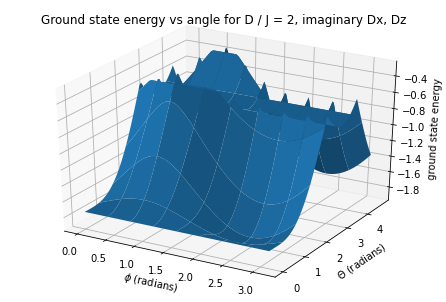

[[0.         0.039767   0.07953399 ... 3.06205866 3.10182566 3.14159265]
 [0.         0.039767   0.07953399 ... 3.06205866 3.10182566 3.14159265]
 [0.         0.039767   0.07953399 ... 3.06205866 3.10182566 3.14159265]
 ...
 [0.         0.039767   0.07953399 ... 3.06205866 3.10182566 3.14159265]
 [0.         0.039767   0.07953399 ... 3.06205866 3.10182566 3.14159265]
 [0.         0.039767   0.07953399 ... 3.06205866 3.10182566 3.14159265]]

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.05965049 0.05965049 0.05965049 ... 0.05965049 0.05965049 0.05965049]
 [0.11930099 0.11930099 0.11930099 ... 0.11930099 0.11930099 0.11930099]
 ...
 [4.59308799 4.59308799 4.59308799 ... 4.59308799 4.59308799 4.59308799]
 [4.65273849 4.65273849 4.65273849 ... 4.65273849 4.65273849 4.65273849]
 [4.71238898 4.71238898 4.71238898 ... 4.71238898 4.71238898 4.71238898]]

[[-1.75       -1.75       -1.75       ... -1.75       -1.75
  -1.75      ]
 [-1.7499985  -1.74986264 -1.749727

In [17]:
steps = 80

ground_array = np.zeros(shape=(steps,steps))

nsites = 2
J = 1.
D = 2.
T = 2   # number of pi's we're cycling through

for j in range(steps): # outer loop for theta
    
    theta = (j*(T/2)*np.pi/steps)*1.5
    
    
    for k in range(steps): # inner loop for phi
        
        phi = k*np.pi*(T/2)/steps
    
    
        Dx = D*np.sin(theta)*np.cos(phi)     # Allowing D vector to vary direction in each loop
        Dy = D*np.sin(theta)*np.sin(phi)
        Dz = D*np.cos(theta)

        sz0 = np.zeros(shape=(2,2)) 
        splus0 = np.zeros(shape=(2,2)) 
        sz0[0,0]         =  0.5
        sz0[1,1]         =  -0.5
        splus0[1,0]      =  1.0
        sminus0 = np.transpose(splus0)

        Ising = np.zeros(shape=(4,4)) 
        Ising = np.kron(sz0,sz0)

        JDp = np.zeros(shape=(2,2))
        JDm = np.zeros(shape=(2,2))

        JDp = (0.5)*(J + Dz)*np.kron(splus0,sminus0)
        JDm = (0.5)*(J - Dz)*np.kron(sminus0,splus0)

        DMx = -Dx*(0.5)*(-np.kron(sz0,splus0) + np.kron(sz0,sminus0) + np.kron(splus0,sz0) - np.kron(sminus0,sz0))
        DMy = Dy*(0.5)*(np.kron(splus0,sz0) + np.kron(sminus0,sz0) - np.kron(sz0,splus0) - np.kron(sz0,sminus0))

        h2 = Ising + JDp + JDm + DMx + DMy

        H = np.zeros(shape=(2,2))
        for i in range(1,nsites):

            diml = 2**(i-1)        # 2^i
            dim = diml*2
    
            #print ("ADDING SITE ",i," DIML= ",diml)

            Ileft = np.eye(diml)
            Iright = np.eye(2)


            aux = np.zeros(shape=(dim,dim))
            aux = np.kron(H,Iright)
            H = aux

            H = H + np.kron(Ileft,h2)
    
    
        w, v = np.linalg.eigh(H) 
          
    
        ground_array[j, k] = w[0]  # This is going to be a 2D array, j -> which theta, k -> which phi
           


from mpl_toolkits.mplot3d import Axes3D 
a = np.pi
b = T*a

theta_array = np.linspace(0,a,steps)   # 1D arrays
phi_array = np.linspace(0,a*1.5,steps)     # Not sure why it's seeming like the way I'm defining these is flipped

# Now build the 2D arrays
theta_array2 = np.zeros(shape=(steps,steps))
phi_array2 = np.zeros(shape=(steps,steps))

for i in range(steps):
    for j in range(steps):
        theta_array2[i,j] = theta_array[j]
        phi_array2[i,j] = phi_array[j]

#ground_array = ground_array.transpose()
#theta_array2 = theta_array2.transpose()
phi_array2 = phi_array2.transpose()        # This transpose is what I needed to make the axes make sense!

       
fig = pyplot.figure()
ax = Axes3D(fig)
ax.set_xlabel('$\phi$ (radians)')
ax.set_ylabel('$\Theta$ (radians)')
ax.set_zlabel('ground state energy')
ax.set_title('Ground state energy vs angle for D / J = 2, imaginary Dx, Dz')
ax.plot_surface(theta_array2, phi_array2, ground_array, rstride=10, cstride=10) 


pyplot.show()




print(theta_array2)
print()
print(phi_array2)
#print()
#print(phi_array)
print()
print(ground_array)


# check that at theta = 0, we should have a flat line at some value because there's no phi dependence.